<a href="https://colab.research.google.com/github/SinothileB/Prediction-of-Product-Sales/blob/main/Markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 - Author:Sinothile Blose

##Project Overview



## Load and Inspect Data


In [3]:
#
import pandas as pd
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df =pd.read_csv(fpath)
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [4]:
#1) How many rows and columns?
df.shape


(8523, 12)

In [5]:
#2) What are the datatypes of each variable?
df.select_dtypes("object")



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [6]:
df.select_dtypes("number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [7]:
#2 Are there duplicates? If so, drop any duplicates.
duplicated_rows = df.duplicated()
# Get the sum of duplicated_rows filter to see the number of duplicate rows
Dup_sum = duplicated_rows.sum()
Dup_sum


0

In [8]:
#4) Identify missing values.
all_nulls = df.isna()
sum_nulls = all_nulls.sum()
sum_nulls


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#5) Address the missing values by using a placeholder value.
cat_n = df.select_dtypes("number").columns
cat_n



Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
# use the list of num columns to fill null values with -1
df[cat_n] = df[cat_n].fillna(-1)


In [11]:
cat_o = df.select_dtypes("object").columns
cat_o


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
df[cat_o] = df[cat_o].fillna("MISSING")

<Axes: >

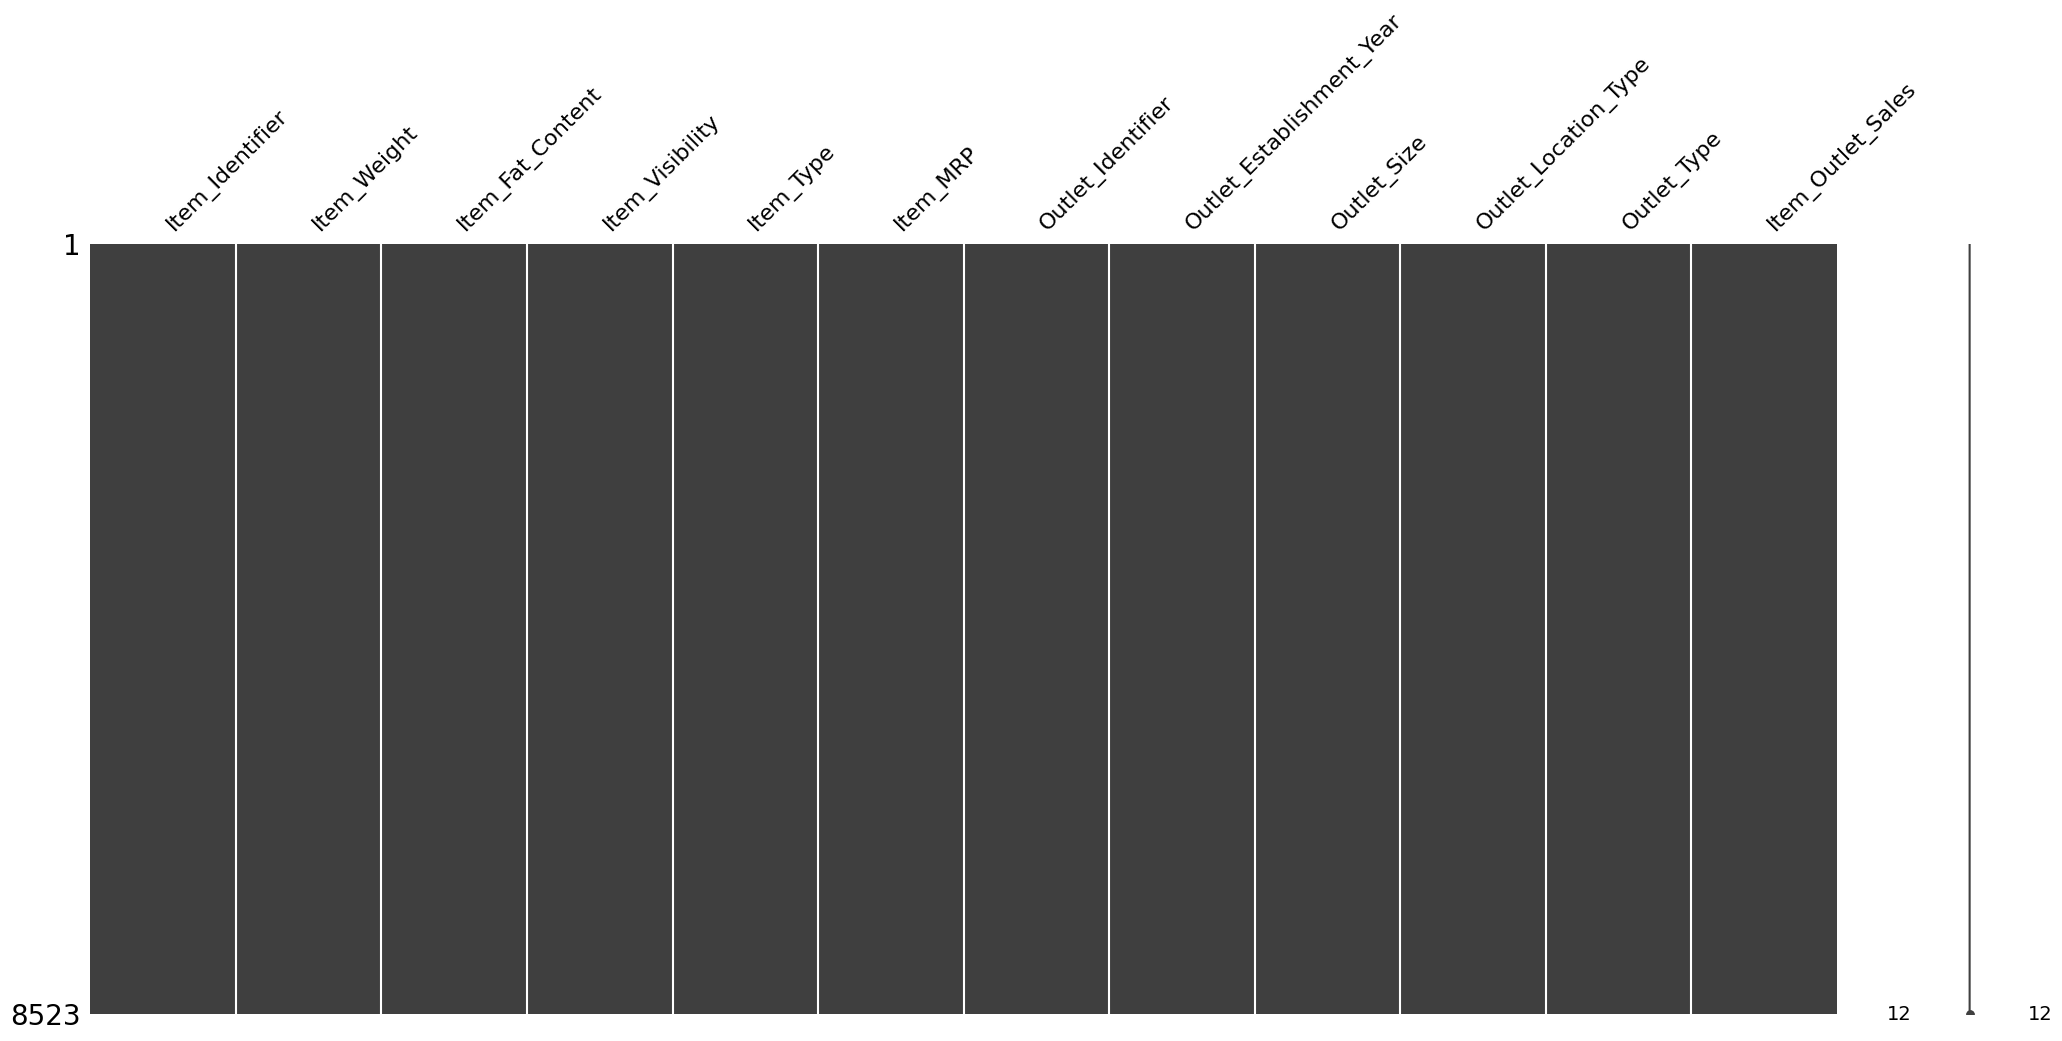

In [13]:
# Confirm no more nulls using using missingno
import missingno as msno
msno.matrix(df)

In [14]:
#Find and fix any inconsistent categories of data
# loop through the list of string columns
for col in cat_o:

  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  # Print an empty line for readability
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [15]:
#Need to fix Value Counts for Item_Fat_Content

df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("Low Fat","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")
# Check the value counts again to confirm
df["Item_Fat_Content"].value_counts()




low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#Obtain the stats for numerical columns
import numpy as np

df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df =pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


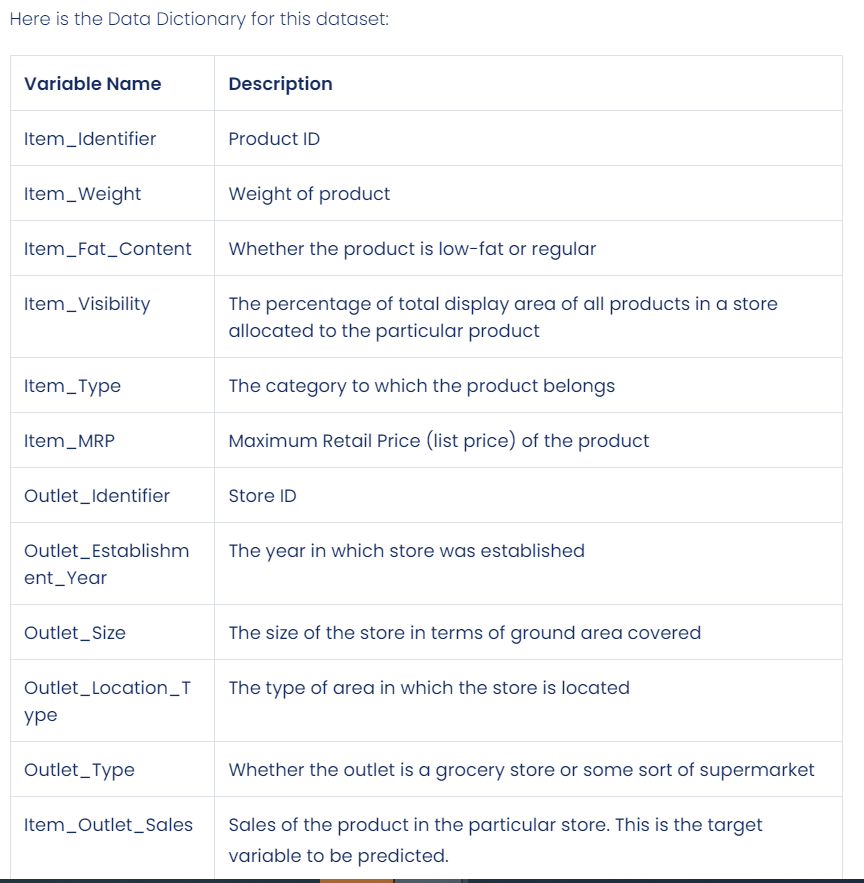

Text(0.5, 1.0, "Distributiopn of Item's weight")

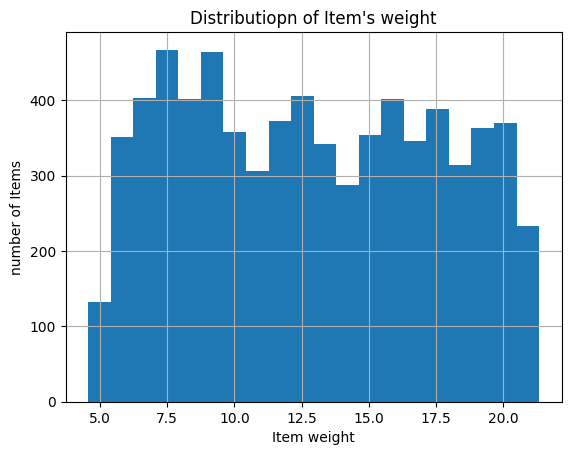

In [18]:
#Histograms to view the distributions of the product weight
#Used auto for a more detailed
ax = df['Item_Weight'].hist(bins ='auto')
ax.set_xlabel ('Item weight')
ax.set_ylabel('number of Items')
ax.set_title("Distributiopn of Item's weight")


In [19]:
#From the above we can see that the items that are found the most are the ones that weigh between 7 and 10

Text(0.5, 1.0, "Item's_Maximum retail price ")

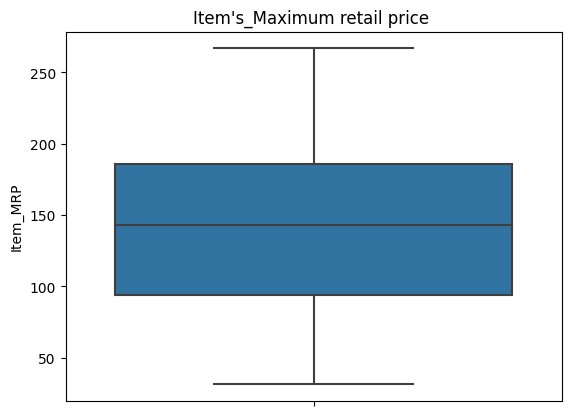

In [20]:
#Boxplots to view statistical summaries of numerical features in your dataset.
# Create a boxplot of sItem_MRP'
ax=sns.boxplot(data =df, y='Item_MRP')
ax.set_title("Item's_Maximum retail price ")


In [21]:
#The are no outliers for the product retail price

Text(0.5, 1.0, 'Item_Outlet_Sales ')

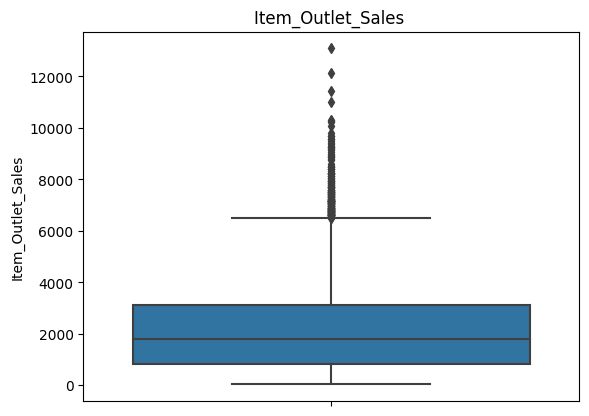

In [22]:
# Create a boxplot of Item_Outlet_Sales
ax=sns.boxplot(data =df, y='Item_Outlet_Sales')
ax.set_title("Item_Outlet_Sales ")


In [23]:
#The are some  outliers on the item-outlet_sales

In [24]:
#Countplots to view the frequency of each class of categorial features in your dataset.

Text(0.5, 1.0, 'frequency of each item type')

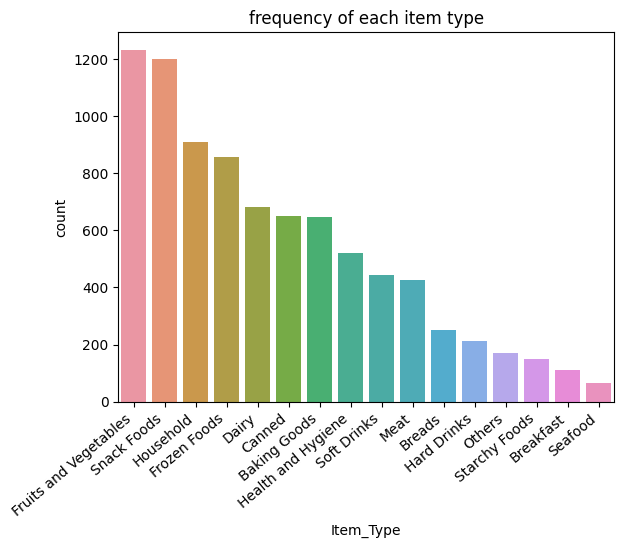

In [25]:
val_counts = df['Item_Type'].value_counts()
ax=sns.countplot(data = df,x='Item_Type' ,order=val_counts.index) #Order by cout to make it easier
ax.set_xticklabels(ax.get_xticklabels(), rotation=40 ,ha='right')
ax.set_title("frequency of each item type")

In [26]:
#Most Items selling in store are fruit and vegetables

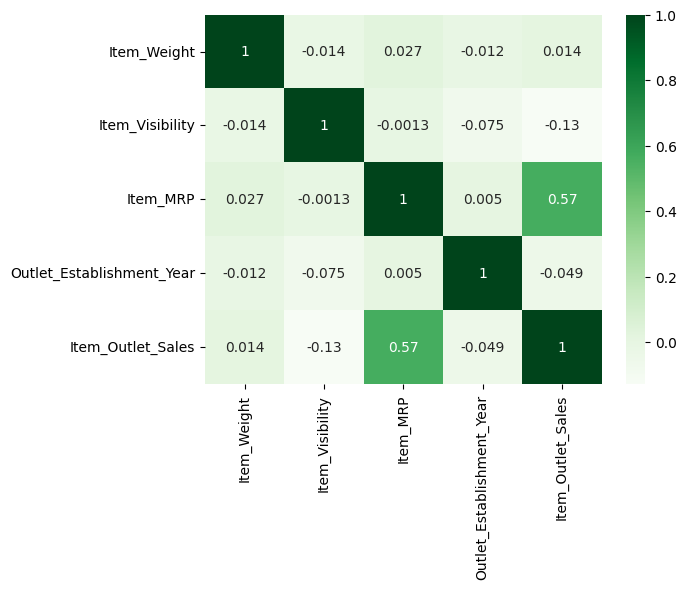

In [27]:
#Heatmap to view the correlation between features.
# Get correlations
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Greens', annot = True);


In [28]:
#Item maximum retail price and Item outlet sales have a strong positive correlation


Text(0.5, 1.0, 'Item_MRP vs Item_Outlet_Sales')

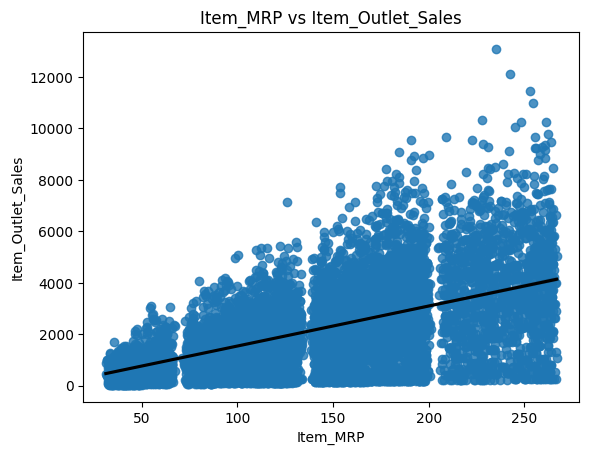

In [29]:
# Create a regplot for the item_MRP vs Item_OutleT_Sales
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",line_kws=line_kws);
ax.set_title("Item_MRP vs Item_Outlet_Sales")

In [30]:
#As the item sales increases the item retail price increase as well

Text(0.5, 1.0, 'Item_MRP vs Item_Visibility')

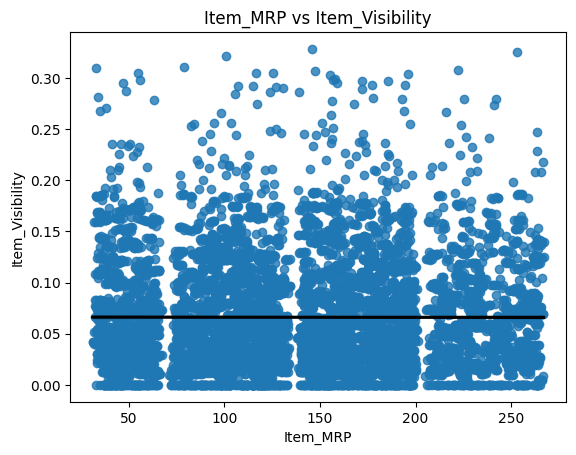

In [31]:
# Create a regplot for the item_MRP vs Item_Visibility
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Visibility",line_kws=line_kws);
ax.set_title("Item_MRP vs Item_Visibility")

In [32]:
#Item_Visibilty and Item maximum retail price have no correlation

##Exploratory Data Analysis Part 4

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

The target is Item_Outlet_Sales

Task is to inspect the features:

For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course.


In [32]:
# Ran the previous cells to continue from where I left off


#custom EDA functions

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [33]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Make a copy of the dataframe

In [34]:
df_copy=df.copy()

Remove the placeholders added in week 2 and replace them with null values.

In [38]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [99]:
#My data  does not have place holders
#If it had I  would have used df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan))
all_nulls = df.isna()
sum_nulls = all_nulls.sum()
sum_nulls


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Feature : {Item_Identifier }

Feature Name:  Item_Identifier - 	Product ID

Confirming the dtype to select correct EDA function

In [40]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

 a univariate visualization showing the distribution of values/categories.

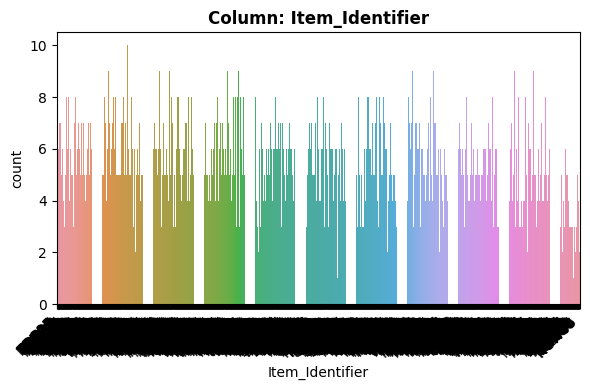

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [43]:
# Calling our custom EDA function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no nulls

3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs in 0.12% of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - The cardinality is high, There are 1559 unique values. This is way more  than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes , it is no use to business and it will lead to curse of dimensionality



a multivariate visualization plotting each feature vs. the target

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

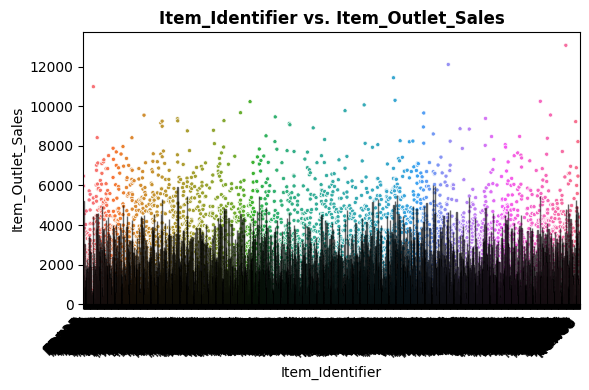

In [51]:
plot_categorical_vs_target(df,feature)

Answer the following questions from the Feature Inspection lesson in a Markdown cell:
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No ,too many unique values

2. Does this feature appear to be a predictor of the target?
 - No , the graph is not clear , so the relationship can't be defined

Feature : {Item_Weight }

Feature Name: Weight of product

In [53]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

a univariate visualization showing the distribution of values/categories.

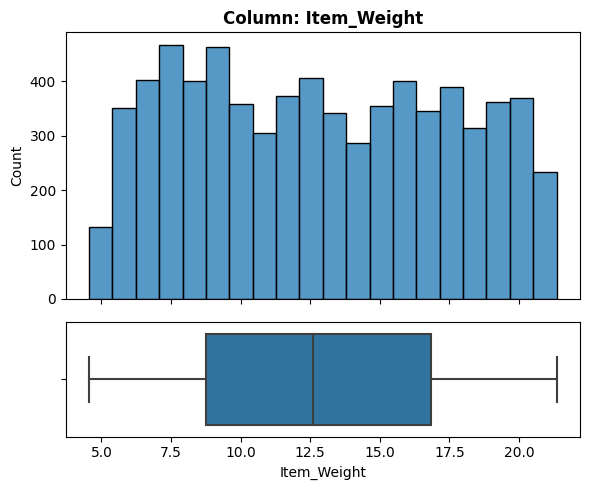

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [54]:
# Calling our custom EDA function
explore_numeric(df, feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 1463 (17.17%) Nulls

- We will investigate the records with nulls further

Is the feature constant or quasi-constant?

- No, the most common value only occurs in 17.17%% of the values. The threshold for quasi-constant is more than 98%.

What is the cardinality? Is it high?
 - Not applicable to a numeric

Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

In [58]:
#Explore the nulls
pd.set_option('display.max_rows', 20)
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [64]:
#Looks like it's for specific outlet types
Outlet_columns = ['Item_Weight', 'Outlet_Type']
Outlet_columns

['Item_Weight', 'Outlet_Type']

In [68]:
# Save filter of null lot frontages
filter_null= df['Item_Weight'].isna()
filter_null.sum()

1463

In [71]:
# Filter the Outlet_Type
check_w = df.loc[filter_null, Outlet_columns]
check_w

,Item_Weight,Outlet_Type
7,NaN,Supermarket Type3
18,NaN,Supermarket Type3
21,NaN,Supermarket Type3
23,NaN,Grocery Store
29,NaN,Grocery Store
...,...,...
8485,NaN,Supermarket Type3
8487,NaN,Supermarket Type3
8488,NaN,Supermarket Type3
8490,NaN,Grocery Store


Since it's specific Outlets , we will drop the nulls.

In [72]:
df.dropna(subset = ['Item_Weight'], inplace=True)

In [73]:
# check
filter_null= df['Item_Weight'].isna()
filter_null.sum()

0

a multivariate visualization plotting each feature vs. the target

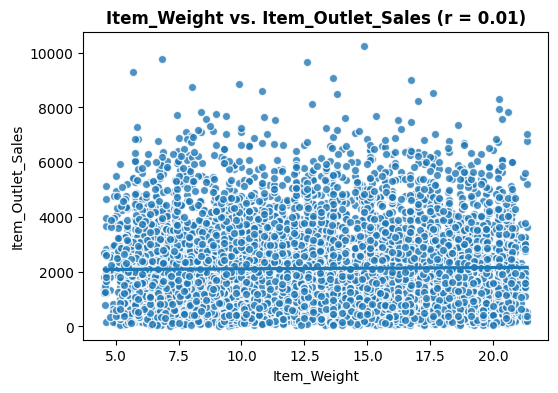

In [74]:
plot_numeric_vs_target(df, feature);

Answer the following questions from the Feature Inspection lesson in a Markdown cell:
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No ,not really

2. Does this feature appear to be a predictor of the target?
 - No,  it has no relationship with the target


Example: {Item_Fat_Content}

Feature Name: Item_Fat_Content	Whether the product is low-fat or regular

In [75]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

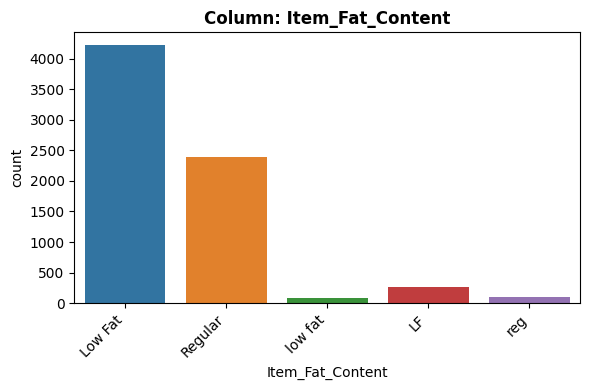

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 4222 times (59.8%)
- Not constant or quasi-constant.


In [77]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);


In [78]:
#Need to fix incosistencies.
#Need to fix Value Counts for Item_Fat_Content

df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("Low Fat","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")
# Check the value counts again to confirm
df["Item_Fat_Content"].value_counts()

low fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

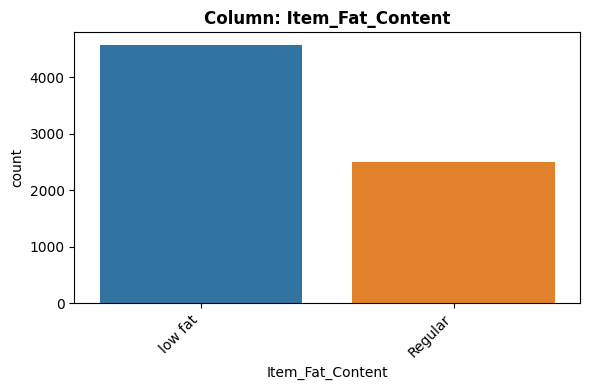

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 4566 times (64.67%)
- Not constant or quasi-constant.


In [79]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  no nulls
  

3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs in 64.67% of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - There are 2 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


Multivariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

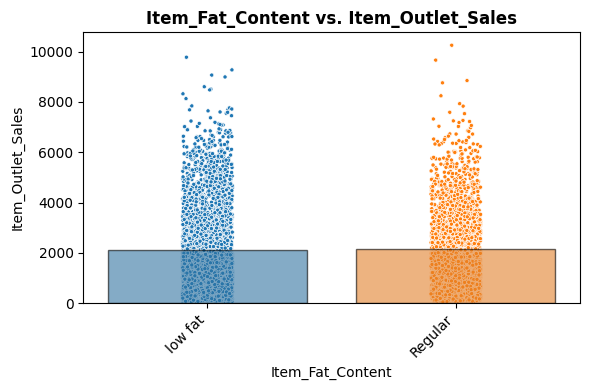

In [80]:
plot_categorical_vs_target(df,feature)

Answer the following questions from the Feature Inspection lesson in a Markdown cell:
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- yes , I would have thought the fat contributes to the sales count

2. Does this feature appear to be a predictor of the target?
- No , The graph is not clear

Example: {Item_Visibility}

Feature Name: Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

In [81]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

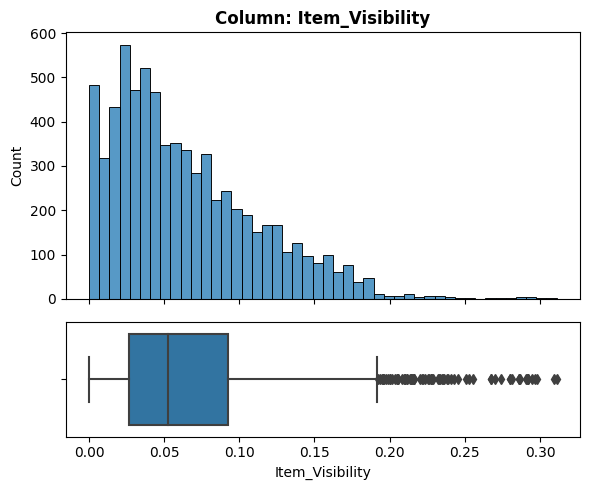

- NaN's Found: 0 (0.0%)
- Unique Values: 6519
- Most common value: '0.0' occurs 436 times (6.18%)
- Not constant or quasi-constant.


In [82]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

 -  No Nulls  0 (0.0%)

Is the feature constant or quasi-constant?

- no because the most common value occurs 6.18%

What is the cardinality? Is it high?
 - not applocable to numeric

Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

No

Multivariate

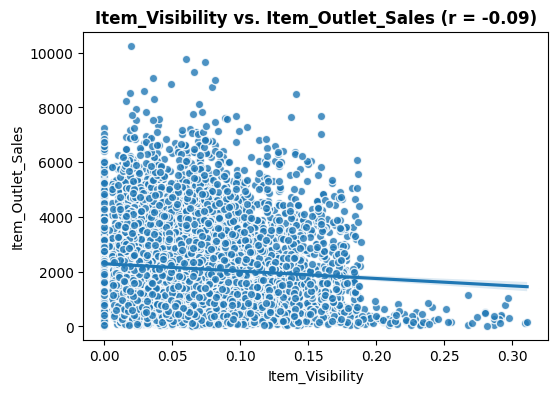

In [83]:
plot_numeric_vs_target(df, feature);

Answer the following questions from the Feature Inspection lesson in a Markdown cell:
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 -Yes, I would have expected that the more visiblity ,more sales

2. Does this feature appear to be a predictor of the target?
  - Yes , but opposite to what I expected , I see an opposite relationship

Example: {Item_Type}


Feature Name: Item_Type:The category to which the product belongs


In [84]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

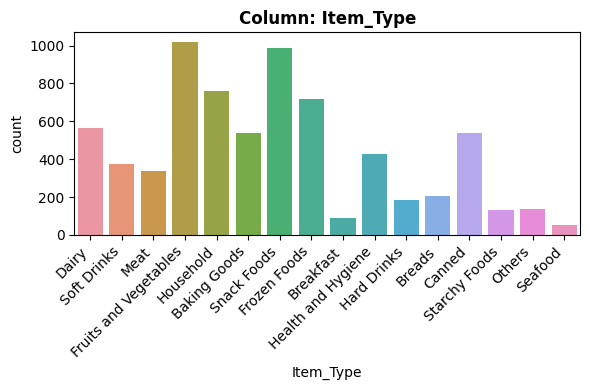

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1019 times (14.43%)
- Not constant or quasi-constant.


In [85]:
# Calling our custom EDA function
explore_categorical(df, feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

 - No Nulls 0%

Is the feature constant or quasi-constant?

 - No, the most common value only occurs in 14.43%% of the values. The threshold for quasi-constant is more than 98%.

What is the cardinality? Is it high?

 - It is high there are 16 unique values. This is more than 10, which is our threshold for high cardinality.

Would we know this BEFORE the target is determined?
 - Yes

Is there a business case/understanding reason to exclude based on our business case?
 - No

Multivariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

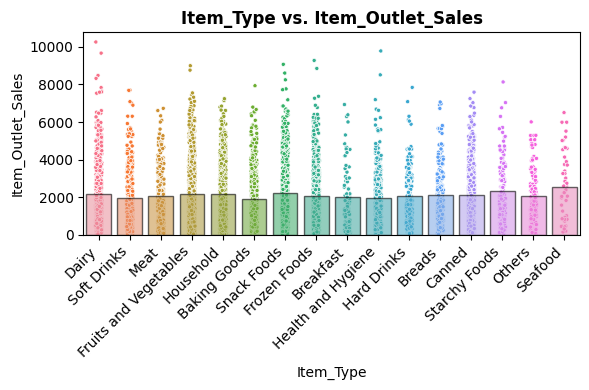

In [86]:
plot_categorical_vs_target(df,feature)

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

1)Based on your business understanding, would you expect this feature to be a predictor of the target?

 - yes

2)Does this feature appear to be a predictor of the target?
 - Yes some Items appear to have more sales , like the dairy products and snacks

Example: {Item_MRP}

Feature Name: Item_MRP	Maximum Retail Price (list price) of the product

In [87]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

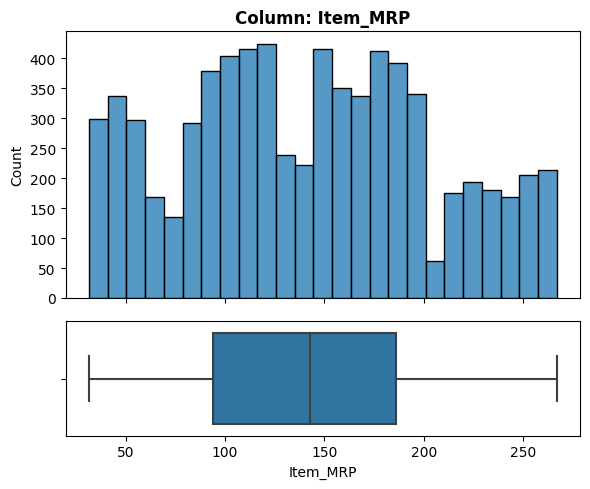

- NaN's Found: 0 (0.0%)
- Unique Values: 5225
- Most common value: '170.5422' occurs 6 times (0.08%)
- Not constant or quasi-constant.


In [88]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);


Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

 - No Nulls 0%

Is the feature constant or quasi-constant?

 - No, the most common value only occurs in 0.08%% of the values. The threshold for quasi-constant is more than 98%.

What is the cardinality? Is it high?

 - Not apllicable to numerics

Would we know this BEFORE the target is determined?
 - Yes

Is there a business case/understanding reason to exclude based on our business case?
 - No

Multivariate

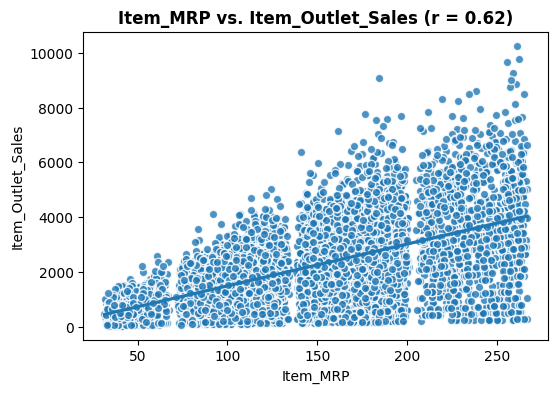

In [89]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, I would think the higher the price, the lower the sales`
  - Does this feature appear to be a predictor of the target?
    - `Yes , we can see a positive relationship between the feature and the target` ,opposite of my expectations


Example: {Outlet_Identifier}

Feature Name: Outlet_Identifier	Store ID

In [90]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

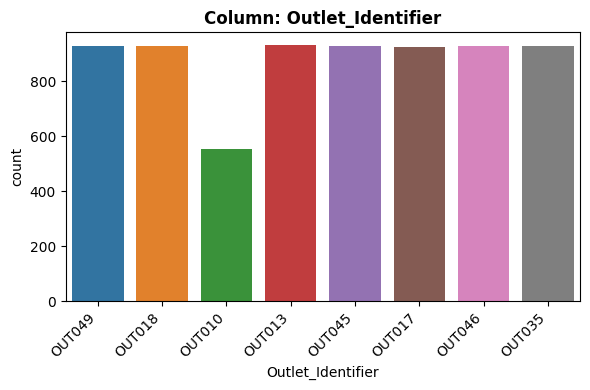

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'OUT013' occurs 932 times (13.2%)
- Not constant or quasi-constant.


In [91]:
# Calling our custom EDA function
explore_categorical(df, feature);


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  No nulls , (0.0%)

3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs in 13.2% of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - There are 8 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I do not think we need the store Id



Multivariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

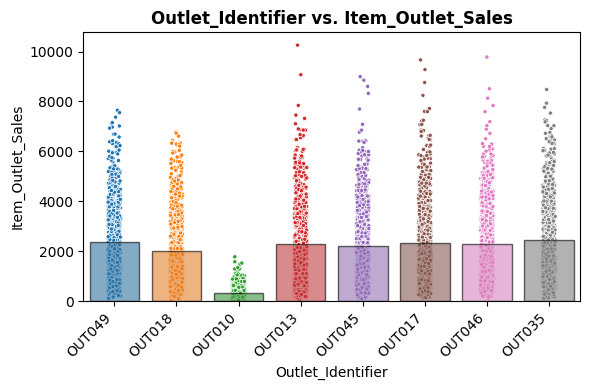

In [92]:
plot_categorical_vs_target(df,feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, I would think some stores have higher sales`?
  - Does this feature appear to be a predictor of the target?
    - `Yes , we can see outlet OUT010 has less sales , while out013 has more

___

Example: {Outlet_Establishment_Year}

Feature Name: Outlet_Establishment_Year	The year in which store was established

In [93]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

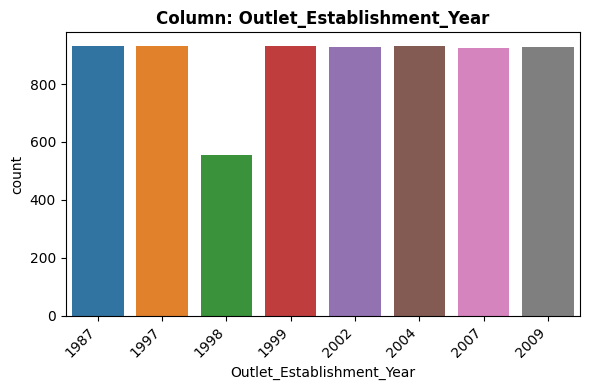

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '1987' occurs 932 times (13.2%)
- Not constant or quasi-constant.


In [94]:
# Calling our custom EDA function
explore_categorical(df, feature);


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - No Nulls 0%
  
3. Is the feature constant or quasi-constant?
  - No , because the most common value occurs 13.2%

4. What is the cardinality? Is it high?
  - Not applicable to a numeric

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No , they play important role

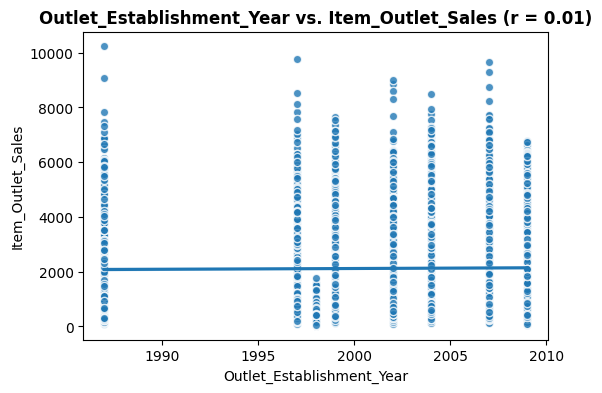

In [95]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would think the older stores have more sales?
  - Does this feature appear to be a predictor of the target?
    - `No , there is no relationship


Example: {Outlet_Size}

Feature Name:Outlet_Size	The size of the store in terms of ground area covered

In [96]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

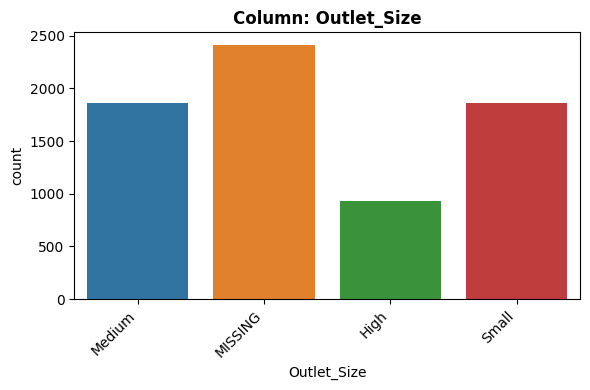

- NaN's Found: 2410 (34.14%)
- Unique Values: 4
- Most common value: 'MISSING' occurs 2410 times (34.14%)
- Not constant or quasi-constant.


In [97]:
# Calling our custom EDA function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  2410 (34.14%) nulls ,

  -  we will drop the rows so that they do not mess the stats, They empties are not mentioned in the dictionary

3. Is the feature constant or quasi-constant?
  - No, the most common value are nulls which  occurs in 34.14% of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - There are 3 unique values,excluding place holder for nulls . This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, this may have an impact on sales



MultiVariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

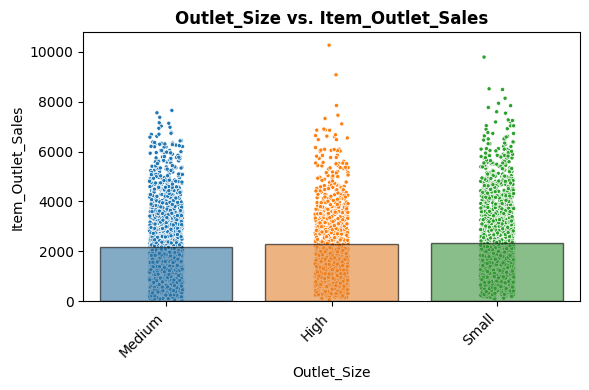

In [100]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature,fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, I would expect the size to impact sales, the bigger the more sales'?

  - Does this feature appear to be a predictor of the target?
    - `Yes, there are some outliers on the High outlest size`


Example: {Outlet_Location_Type}

Feature Name: Outlet_Location_Type: The type of area in which the store is located

In [101]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

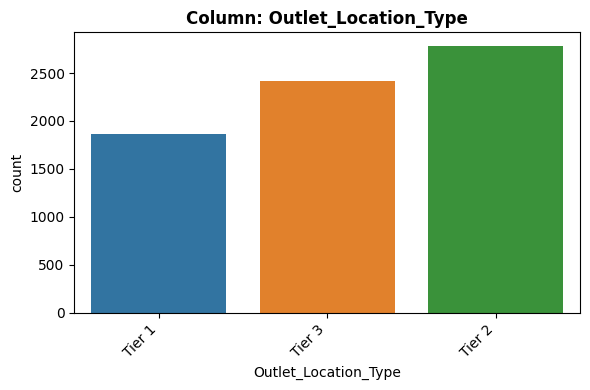

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 2' occurs 2785 times (39.45%)
- Not constant or quasi-constant.


In [102]:
# Calling our custom EDA function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - No nulls

3. Is the feature constant or quasi-constant?
  - No , because the most common value occurs 39.45%

4. What is the cardinality? Is it high?
  - Low(3)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No , they play important role in determining the sales

Multivariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

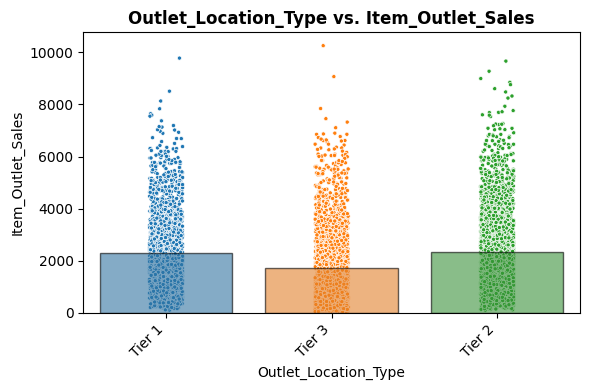

In [103]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, I think so'?
  - Does this feature appear to be a predictor of the target?
    - `Yes , we can see  some having higher sales , like Tier1 and Tier2

___

Example: {Outlet_Type}

Feature Name: Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket

In [104]:
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

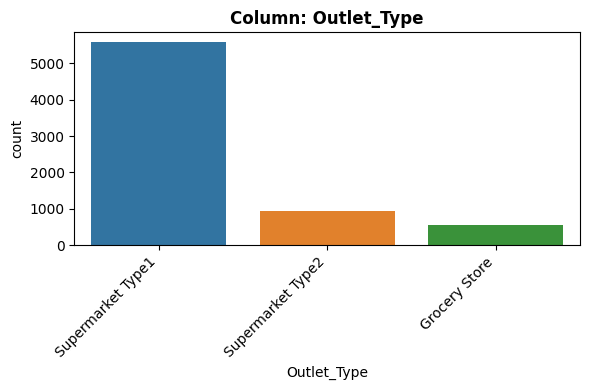

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Supermarket Type1' occurs 5577 times (78.99%)
- Not constant or quasi-constant.


In [105]:
# Calling our custom EDA function
explore_categorical(df, feature);


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - No Nulls


3. Is the feature constant or quasi-constant?
  - No , because the most common value occurs 78.99%

4. What is the cardinality? Is it high?
  - Low(3)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No , they play important role in determining the sales count

Multivariate

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

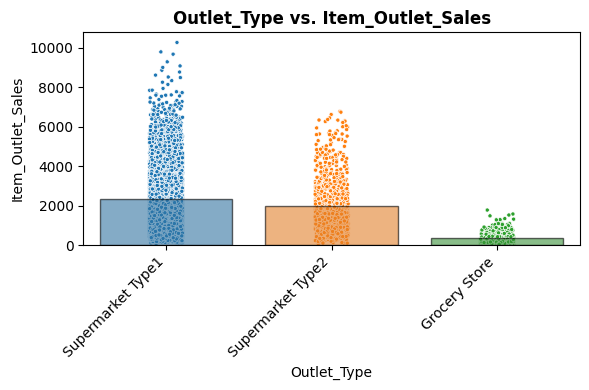

In [106]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, Ithink so`
  - Does this feature appear to be a predictor of the target?
    - `Yes , we can see a Supermakets type1 has more sales, than the other 2.

___